In [73]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.restoration import denoise_tv_chambolle

In [74]:
def add_gaussian_noise(image, mean=0, std=25):
    noise = np.random.normal(mean, std, image.shape).astype(np.uint8)
    noisy_image = cv2.add(image, noise)
    return noisy_image

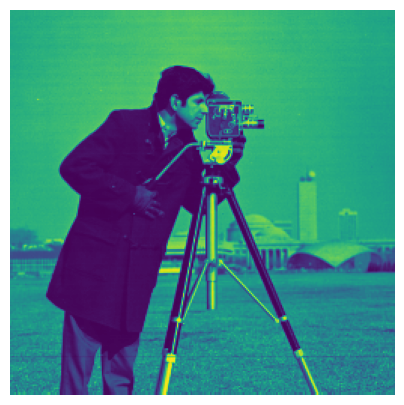

In [75]:
image = cv2.imread('cameraman.tif', cv2.IMREAD_GRAYSCALE)
#image = cv2.resize(image,[25,25])
height, width = image.shape
noisy_image = add_gaussian_noise(image, mean=0, std=5)
plt.figure(figsize=(5,5))
plt.axis("off")
plt.imshow(image)
plt.show()

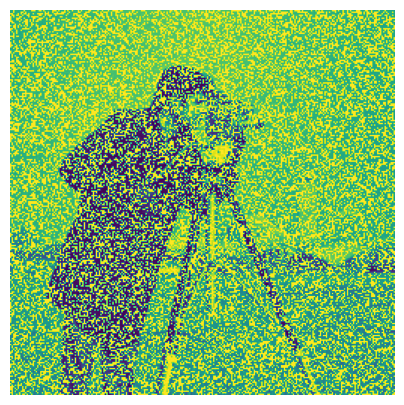

In [76]:
plt.figure(figsize=(5,5))
plt.axis("off")
plt.imshow(noisy_image)
plt.show()

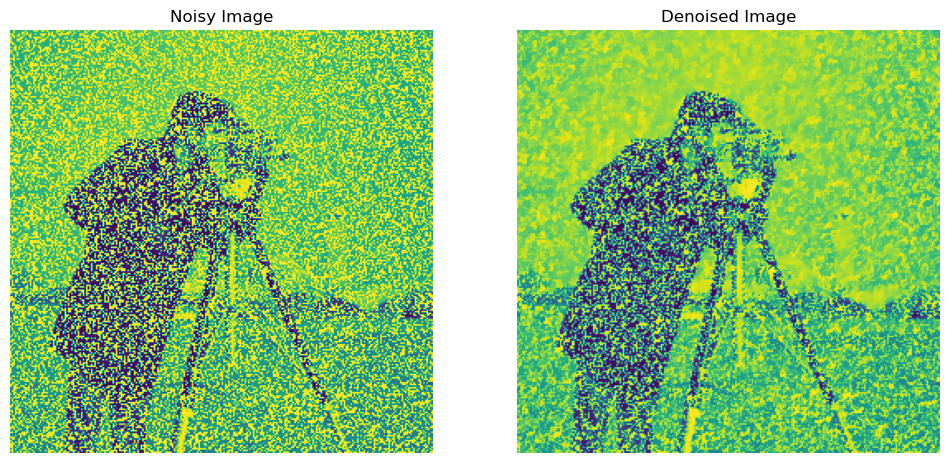

In [77]:
# Apply Tikhonov regularization 
lambda_reg = 0.08  # Adjust as needed
denoised_image = denoise_tv_chambolle(noisy_image, weight=lambda_reg)

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Noisy Image')
plt.imshow(noisy_image)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Denoised Image')
plt.imshow(denoised_image)
plt.axis('off')

plt.show()

In [78]:
image[:5,:5]

array([[156, 159, 158, 155, 158],
       [160, 154, 157, 158, 157],
       [156, 159, 158, 155, 158],
       [160, 154, 157, 158, 157],
       [156, 153, 155, 159, 159]], dtype=uint8)

In [79]:
noisy_image[:5,:5]

array([[164, 160, 255, 166, 166],
       [160, 161, 255, 159, 164],
       [255, 255, 163, 158, 166],
       [166, 255, 255, 162, 255],
       [255, 156, 255, 162, 159]], dtype=uint8)

In [80]:
(255*denoised_image[:5,:5])

array([[176.89724907, 176.95169002, 214.43185347, 177.60959936,
        176.74607995],
       [176.9218257 , 183.27599057, 214.29562684, 178.23502552,
        177.2421462 ],
       [217.87469942, 218.55739091, 196.39736479, 180.09703457,
        179.87847358],
       [213.11472205, 220.04056427, 217.83743003, 185.65086113,
        207.30913499],
       [223.80085085, 198.77304629, 213.34986235, 185.09503512,
        188.54913142]])

In [81]:
A = np.array([[1,1],[1,1.0002]])
b = np.array([[1],[0.99]])

In [82]:
x_ls = np.linalg.inv(A.T @ A) @ A.T @ b
x_ls

array([[ 50.99999965],
       [-49.99999964]])

In [83]:
I = np.eye(2)
alpha = 0.1

In [84]:
x_tk = np.linalg.inv(A.T @ A+alpha*I) @ A.T @ b
x_tk 

array([[0.48532343],
       [0.48536186]])

In [85]:
A @ x_ls

array([[1.00000001],
       [0.99000001]])

In [86]:
A @ x_tk

array([[0.97068529],
       [0.97078236]])

In [87]:
A_m = A.T @ A + alpha*np.eye(2)
print(f'cond = {np.linalg.cond(A_m)}')

lib = 41.00399620002024


In [88]:
eig,eig_v = np.linalg.eig(A_m)
print(f'eigan values = {eig}\neigan_vect = \n{eig_v}')

eigan values = [0.10000001 4.10040003]
eigan_vect = 
[[-0.70714214 -0.70707142]
 [ 0.70707142 -0.70714214]]
